Abel Esteban Ferrer, 1677491

Victor Diaz Armenteros , 1636657

# League Of Legends: PREDICCIÓ DE QUIN EQUIP GUANYA LA PARTIDA.

https://www.kaggle.com/datasets/datasnaek/league-of-legends/code

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")


# Exploració Inicial del dataset, anàlisis i ajustos

El Dataset conté:
- Identificadors: gameId, CreationTime, gameDuration, seasonID
- Resultats per equip: winner, firstBlood, firstTower, firstInhibitor, firstBaron, firstDragon, firstRiftHerald.
- Campions i poders(personatges tant de t1 com t2): t1_champ1id a t1_champ5id. 
Bloquejos (tant de t1 com t2): t1_ban1 a t1_ban5

In [11]:
data = pd.read_csv('games.csv')
data

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51485,3308904636,1503076540231,1944,9,2,1,2,2,0,2,...,10,2,0,4,0,55,-1,90,238,157
51486,3215685759,1496957179355,3304,9,2,1,1,2,2,2,...,11,7,4,4,1,157,55,119,154,105
51487,3322765040,1504029863961,2156,9,2,2,2,2,0,1,...,10,2,0,2,0,113,122,53,11,157
51488,3256675373,1499562036246,1475,9,2,2,2,2,0,2,...,11,3,0,1,0,154,39,51,90,114


In [12]:
num_attributes = data.shape
attribute_names = data.columns.tolist()
tipus = data.dtypes
print("Tamany del Dataset:", num_attributes)
print("Atributss:", attribute_names)
print("-------------------------")
print("Tipos de atributos:", tipus)


Tamany del Dataset: (51490, 61)
Atributss: ['gameId', 'creationTime', 'gameDuration', 'seasonId', 'winner', 'firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron', 'firstDragon', 'firstRiftHerald', 't1_champ1id', 't1_champ1_sum1', 't1_champ1_sum2', 't1_champ2id', 't1_champ2_sum1', 't1_champ2_sum2', 't1_champ3id', 't1_champ3_sum1', 't1_champ3_sum2', 't1_champ4id', 't1_champ4_sum1', 't1_champ4_sum2', 't1_champ5id', 't1_champ5_sum1', 't1_champ5_sum2', 't1_towerKills', 't1_inhibitorKills', 't1_baronKills', 't1_dragonKills', 't1_riftHeraldKills', 't1_ban1', 't1_ban2', 't1_ban3', 't1_ban4', 't1_ban5', 't2_champ1id', 't2_champ1_sum1', 't2_champ1_sum2', 't2_champ2id', 't2_champ2_sum1', 't2_champ2_sum2', 't2_champ3id', 't2_champ3_sum1', 't2_champ3_sum2', 't2_champ4id', 't2_champ4_sum1', 't2_champ4_sum2', 't2_champ5id', 't2_champ5_sum1', 't2_champ5_sum2', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills', 't2_riftHeraldKills', 't2_ban1', 't2_ban2', 't2_ban3', 't2_ban4',

In [13]:
nils = data.isnull().sum()
print("Nils per atribut:") #Una mica inútil ja que aquest dataset no te nuls, i s'enfoca més en el predict en base a les estadístiques existents amb ús de models i altres tècniques de l'assignatura
print(nils)

Nils per atribut:
gameId          0
creationTime    0
gameDuration    0
seasonId        0
winner          0
               ..
t2_ban1         0
t2_ban2         0
t2_ban3         0
t2_ban4         0
t2_ban5         0
Length: 61, dtype: int64


In [14]:
# Eliminem les columnes que no afecten al predir qui guanyarà dels 2 equips
data = data.drop(['gameId', 'creationTime'], axis=1)
data = data.drop_duplicates()

In [15]:
#Passem les variables de segons a minuts per un millor futur tractament:
data['gameDuration'] = data['gameDuration'] / 60


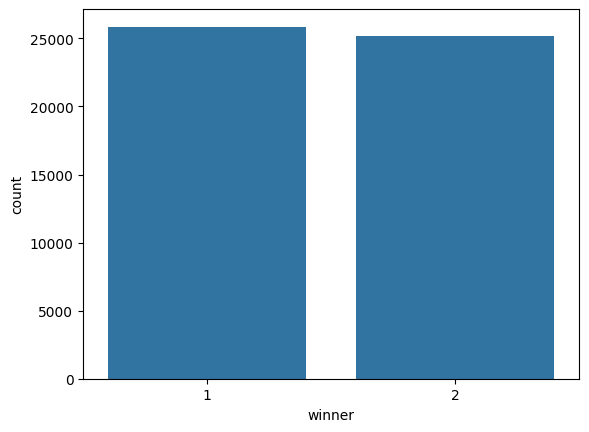

In [16]:
#Mirem el balanceig de la dada a predir (veiem que si esta balancejat)
sns.countplot(data=data, x='winner')
plt.show()

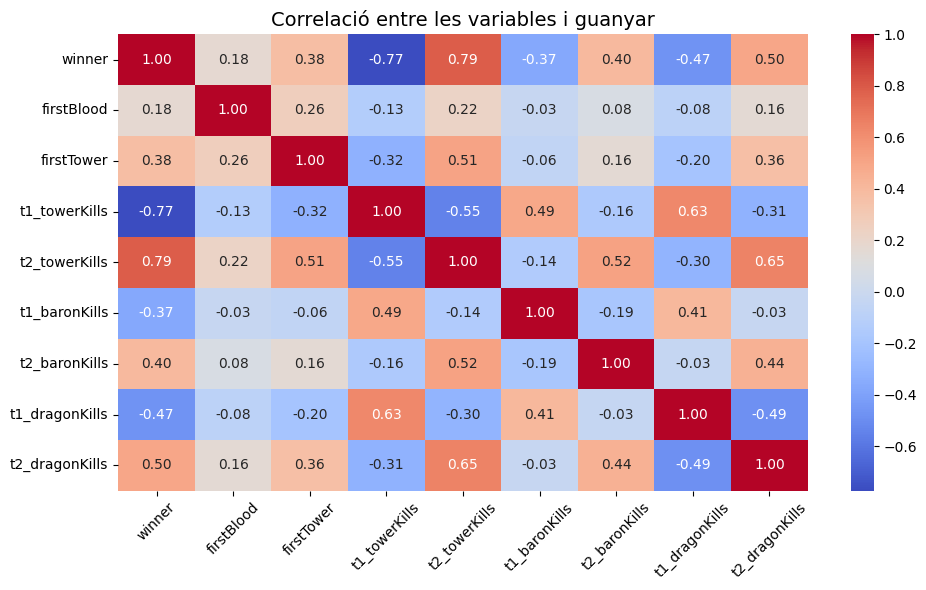

In [17]:
#Anàlisis de la correlació entre variables que són més decisives en una partida de League Of Legends
cols_to_corr = ['winner', 'firstBlood', 'firstTower', 't1_towerKills', 't2_towerKills',
                't1_baronKills', 't2_baronKills', 't1_dragonKills', 't2_dragonKills']

# Calcular matriz de correlación solo con estas columnas
corr = data[cols_to_corr].corr()

plt.figure(figsize=(10, 6))  # Ajusta tamany
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10}, cbar=True)
plt.title("Correlació entre les variables i guanyar", fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Nous camps
Creem un conjunt de columnes que indiquen la diferencia de les puntuacions dels dos equips en els diferents ambits de la partida. Això ajuda molt a l'anàlisis ja que tindre superioritat en positiu o negatiu en aquests camps, implica una certa avantatge de cara a guanyar.

In [18]:
data['tower_diff'] = data['t1_towerKills'] - data['t2_towerKills']
data['inhibitor_diff'] = data['t1_inhibitorKills'] - data['t2_inhibitorKills']
data['baron_diff'] = data['t1_baronKills'] - data['t2_baronKills']
data['dragon_diff'] = data['t1_dragonKills'] - data['t2_dragonKills']
data['riftHerald_diff'] = data['t1_riftHeraldKills'] - data['t2_riftHeraldKills']

# AQUÍ TENIM QUE POSAR MOLTES COSES DE ANÀLISIS ETC... PERO PASSO A MODELS DIRECTAMENT DE MOMENT

In [19]:
#Codi del títol de sobre


# MODELS I AVALUACIÓ

Resultados de Evaluación de Modelos:

Modelo: Logistic Regression
Reporte de Clasificación:
              precision    recall  f1-score       support
1              0.547129  0.746809  0.631562   7757.000000
2              0.584602  0.365657  0.449906   7559.000000
accuracy       0.558697  0.558697  0.558697      0.558697
macro avg      0.565866  0.556233  0.540734  15316.000000
weighted avg   0.565623  0.558697  0.541908  15316.000000
ROC AUC Score: 0.5813

Modelo: Random Forest
Reporte de Clasificación:
              precision    recall  f1-score       support
1              0.965664  0.968029  0.966845   7757.000000
2              0.967109  0.964678  0.965892   7559.000000
accuracy       0.966375  0.966375  0.966375      0.966375
macro avg      0.966386  0.966353  0.966368  15316.000000
weighted avg   0.966377  0.966375  0.966374  15316.000000
ROC AUC Score: 0.9966

Modelo: Linear SVM
Reporte de Clasificación:
              precision    recall  f1-score       support
1              

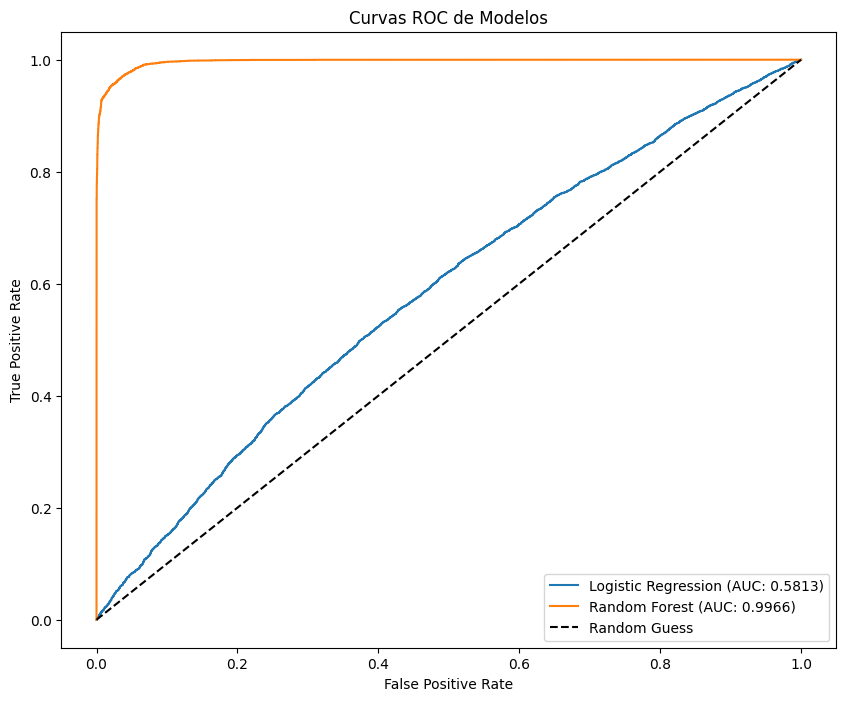

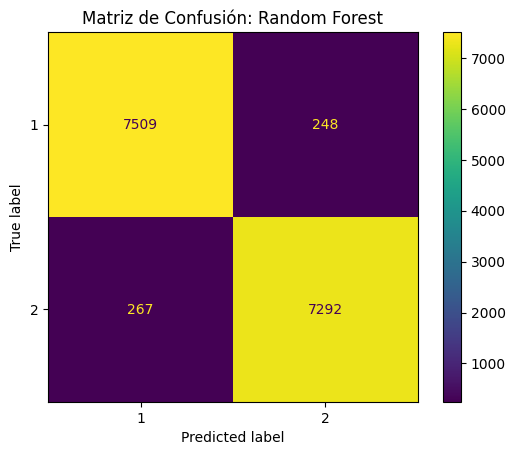

In [20]:
#Tenim +5000 linies al csv, així que agafem menys perquè sino el nostre ordinador peta.
data_sample = data.sample(frac=0.01, random_state=42)  # Usa el 2% de los datos

# Definir variables predictoras (X) y la columna objetivo (y)
X = data.drop(columns=["winner"])  # Asegúrate de ajustar esto según tus columnas
y = data["winner"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40, stratify=y)

# Inicializar modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=2, random_state=40),
    "Random Forest": RandomForestClassifier(n_estimators=20, max_depth=10, random_state=40),
    "Linear SVM": LinearSVC(random_state=40),
}

# Diccionario para almacenar resultados
results = {}

# Entrenamiento y evaluación de modelos
for name, model in models.items():
    model.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(X_test)  # Predicciones
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # Probabilidades
    
    # Reporte de clasificación
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # ROC AUC
    auc_score = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    
    # Guardar resultados
    results[name] = {
        "classification_report": report,
        "roc_auc_score": auc_score,
        "confusion_matrix": confusion_matrix(y_test, y_pred),
    }

# Visualizar métricas clave y comparar modelos
print("Resultados de Evaluación de Modelos:")
for name, result in results.items():
    print(f"\nModelo: {name}")
    print("Reporte de Clasificación:")
    print(pd.DataFrame(result["classification_report"]).transpose())
    if result["roc_auc_score"] is not None:
        print(f"ROC AUC Score: {result['roc_auc_score']:.4f}")

# Graficar Curvas ROC
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label=2)
        plt.plot(fpr, tpr, label=f"{name} (AUC: {results[name]['roc_auc_score']:.4f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC de Modelos")
plt.legend()
plt.show()

# Mostrar una matriz de confusión para el mejor modelo
best_model_name = max(results, key=lambda x: results[x]["roc_auc_score"] or 0)
best_conf_matrix = results[best_model_name]["confusion_matrix"]
ConfusionMatrixDisplay(best_conf_matrix, display_labels=models[best_model_name].classes_).plot()
plt.title(f"Matriz de Confusión: {best_model_name}")
plt.show()


Anàlisis del resultat dels models i corves: 
Ejes:
El eje X (False Positive Rate, Tasa de Falsos Positivos): Representa la proporción de instancias negativas que se clasifican incorrectamente como positivas.
El eje Y (True Positive Rate, Tasa de Verdaderos Positivos): Representa la proporción de instancias positivas clasificadas correctamente.

Curva ROC del modelo "Random Forest": Es la curva naranja.
Tiene un AUC de 0.9966, lo que indica que el modelo Random Forest tiene un rendimiento excelente, muy cercano al óptimo (AUC=1). Su curva está muy cerca del vértice superior izquierdo (𝐹𝑃𝑅=0,𝑇𝑃𝑅=1
FPR=0,TPR=1), lo cual significa que tiene un buen balance entre la tasa de verdaderos positivos y la tasa de falsos positivos.

Curva ROC del modelo "Logistic Regression":Es la curva azul.
Tiene un AUC de 0.5813, lo que sugiere un rendimiento bajo, apenas mejor que la línea "Random Guess". Este modelo no separa bien las clases y su capacidad predictiva es limitada.

Línea "Random Guess" (Negra discontinua): Representa el rendimiento de un modelo que adivina aleatoriamente. Su AUC sería 0.5.
Los modelos útiles deberían tener una curva ROC que esté por encima de esta línea.

Conclusión:
El modelo Random Forest es mucho más efectivo en esta tarea, con un AUC cercano a 1, lo que sugiere que predice correctamente casi siempre.
El modelo Logistic Regression tiene un rendimiento modesto, apenas mejor que adivinar al azar.
Basandonos en este gráfico, deberíamos optar por Random Forest como el modelo preferido para este problema.

# Millora amb HIPERPARÀMETRES

Fem ús del GridSearch per a una optimització superior i conseguir resultats més positius que en els models anteriors a seques

In [23]:
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=40), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

#{'max_depth': 10, 'n_estimators': 200}

{'max_depth': 10, 'n_estimators': 100}


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parámetro de regularización inverso
    'penalty': ['l1', 'l2'],  # Regularización L1 o L2
    'solver': ['liblinear', 'saga'],  # Métodos de optimización
    'max_iter': [100, 200, 300]  # Número máximo de iteraciones
}

grid_search = GridSearchCV(LogisticRegression(random_state=40), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Usar los mejores hiperparámetros directamente
final_model = LogisticRegression(
    C=100, 
    max_iter=100, 
    penalty='l2', 
    solver='liblinear',
    random_state=40
)

# Entrenar el modelo final con los mejores parámetros
final_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = final_model.predict(X_test)
print("Accuracy en el test amb els paràmetres obtinguts al Grid:", accuracy_score(y_test, y_pred))



Accuracy en el test amb els paràmetres obtinguts al Grid: 0.9599112039697049


In [ ]:
# Entrenar modelo final con los mejores hiperparámetros
final_model = RandomForestClassifier(max_depth=None, n_estimators=200, random_state=40)
final_model.fit(X_train, y_train)

# Evaluar en el conjunto de prueba
y_pred = final_model.predict(X_test)
print("Accuracy en el test amb els paràmetres obtinguts al Grid:", accuracy_score(y_test, y_pred))

Accuracy en el test amb els paràmetres obtinguts al Grid: 0.9678114390180204


Gràcies a la busqueda d'hiperparametres amb GridSearch, augmentem el accuracy en un 0.002, cosa que extrapolada a l'altre 99% del dataset pot acabar tractant-se d'una millora de segons considerable

# Segona avaluació de predicció amb parametres de 'early game'

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Cargar el CSV
data = pd.read_csv("games.csv")  # Ajusta el nombre del archivo según corresponda

# Seleccionar solo las columnas relevantes
features = ["seasonId", "firstBlood", "firstDragon", "firstRiftHerald", "firstTower"]
target = "winner"  # La columna que indica el equipo ganador (1 o 2)
data = data[features + [target]]

# Dividir en predictores (X) y objetivo (y)
X = data[features]
y = data[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.72      0.73      0.72      7823
           2       0.72      0.70      0.71      7624

    accuracy                           0.72     15447
   macro avg       0.72      0.72      0.72     15447
weighted avg       0.72      0.72      0.72     15447

Matriz de confusión:
[[5708 2115]
 [2259 5365]]
ROC AUC Score: 0.7854


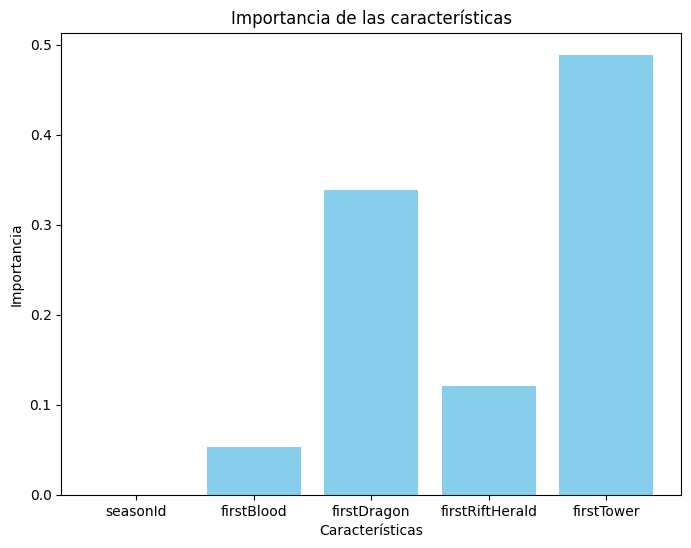

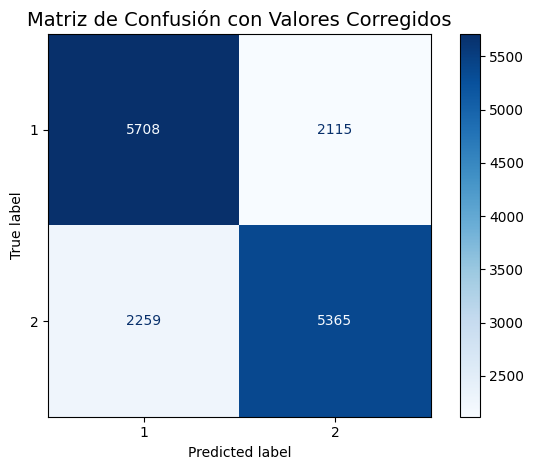

In [26]:
# Inicializar el modelo
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Métricas de evaluación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

# Importancia de las características
importances = model.feature_importances_
plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='skyblue')
plt.title("Importancia de las características")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()


# Mostrar la matriz de confusión con anotaciones bien posicionadas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")

# Asegurarse de que las posiciones se ajusten correctamente
plt.title("Matriz de Confusión con Valores Corregidos", fontsize=14)
plt.tight_layout()  # Asegura que no haya recortes en la figura
plt.show()

